<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/Reading_MIT_Indoor_Scene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando os Dados e incluindo no Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Fundamentals_Deep_Learning

!ls




/content/gdrive/MyDrive/Fundamentals_Deep_Learning
 001_tensorflow.ipynb		     activities.csv
 00_jupyterlab.ipynb		     asl_model
 01_mnist.ipynb			     BANKEX.csv
 02_asl.ipynb			    'Cópia de 01_mnist.ipynb'
 03_asl_cnn.ipynb		     data
 04a_asl_augmentation.ipynb	     images
 04b_asl_predictions.ipynb	     mit_indoor_scene_dataset
 05a_doggy_door.ipynb		    'NN FeedForward - CIFAR - 10.ipynb'
 05b_presidential_doggy_door.ipynb   outdir
 06_headline_generator.ipynb	     RNN_multi.ipynb


In [ ]:
import requests
import os

# Define the URL of the dataset
url = "http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar"

# Define the directory where you want to save the dataset
save_dir = "/content/gdrive/MyDrive/Fundamentals_Deep_Learning/mit_indoor_scene_dataset"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the path where you want to save the downloaded file
save_path = os.path.join(save_dir, "indoorCVPR_09.tar.gz")

# Send an HTTP GET request to download the dataset
response = requests.get(url, stream=True)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary write mode and write the content of the response
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)

    print(f"Downloaded the dataset to {save_path}")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

# You can now extract the contents of the downloaded tar.gz file using Python's tarfile module if needed.


Downloaded the dataset to /content/gdrive/MyDrive/Fundamentals_Deep_Learning/mit_indoor_scene_dataset/indoorCVPR_09.tar.gz


In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
import pathlib

In [ ]:
from PIL import Image
import os
import tarfile
import os

# Define the path to an example image
image_path = "/content/gdrive/MyDrive/Fundamentals_Deep_Learning/mit_indoor_scene_dataset/indoorCVPR_09.tar.gz"



t = tarfile.open(image_path, 'r')
for member in t.getmembers():
    if ".jpg" in member.name:
        t.extract(member, "outdir")

print(os.listdir('outdir'))

# Leitura dos Dados

In [8]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Set the path to your dataset directory
dataset_dir = '/content/gdrive/MyDrive/Fundamentals_Deep_Learning/outdir/Images'

# Create an instance of the ImageFolder dataset
dataset = ImageFolder(root=dataset_dir, transform=transform)

# Define the percentage of data to use for testing
test_split = 0.25  # 25% for testing

# Calculate the size of the testing set
test_size = int(test_split * len(dataset))
train_size = len(dataset) - test_size

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for training and testing
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the number of samples in the training and testing sets
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

# You can now use train_dataloader and test_dataloader to iterate through your data in batches for training and testing.
# Your training and evaluation code goes here.


Number of training samples: 11710
Number of testing samples: 3903


In [37]:
dataset.class_to_idx

{'airport_inside': 0,
 'artstudio': 1,
 'auditorium': 2,
 'bakery': 3,
 'bar': 4,
 'bathroom': 5,
 'bedroom': 6,
 'bookstore': 7,
 'bowling': 8,
 'buffet': 9,
 'casino': 10,
 'children_room': 11,
 'church_inside': 12,
 'classroom': 13,
 'cloister': 14,
 'closet': 15,
 'clothingstore': 16,
 'computerroom': 17,
 'concert_hall': 18,
 'corridor': 19,
 'deli': 20,
 'dentaloffice': 21,
 'dining_room': 22,
 'elevator': 23,
 'fastfood_restaurant': 24,
 'florist': 25,
 'gameroom': 26,
 'garage': 27,
 'greenhouse': 28,
 'grocerystore': 29,
 'gym': 30,
 'hairsalon': 31,
 'hospitalroom': 32,
 'inside_bus': 33,
 'inside_subway': 34,
 'jewelleryshop': 35,
 'kindergarden': 36,
 'kitchen': 37,
 'laboratorywet': 38,
 'laundromat': 39,
 'library': 40,
 'livingroom': 41,
 'lobby': 42,
 'locker_room': 43,
 'mall': 44,
 'meeting_room': 45,
 'movietheater': 46,
 'museum': 47,
 'nursery': 48,
 'office': 49,
 'operating_room': 50,
 'pantry': 51,
 'poolinside': 52,
 'prisoncell': 53,
 'restaurant': 54,
 'resta

In [ ]:
# Get the first batch (you can change this to any batch you want to inspect)

label_to_count=[]

for i in range(0,600):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(600,1200):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(1200,1800):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(1800,2400):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(2400,3000):

  label_to_count.append(train_dataset[i][1])
  print(i)



In [ ]:
for i in range(3000,3600):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(3600,4200):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(4200,4800):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(4800,5400):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(5400,6000):

  label_to_count.append(train_dataset[i][1])
  print(i)


In [ ]:
for i in range(6000,6600):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(6600,7200):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(7200,7800):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(7800,8400):

  label_to_count.append(train_dataset[i][1])
  print(i)

for i in range(8400,9000):

  label_to_count.append(train_dataset[i][1])
  print(i)


In [ ]:
for i in range(9000,len(train_dataset)):

  label_to_count.append(train_dataset[i][1])
  print(i)


In [47]:
# Your NumPy array of integers
my_array = np.array(label_to_count)  # Example codes for 'A', 'B', 'C'

# Convert integers to strings using NumPy's vectorized operations
string_array = my_array.astype(str)

# Now, 'string_array' contains the elements as strings
print(string_array)

['62' '41' '56' ... '3' '6' '41']


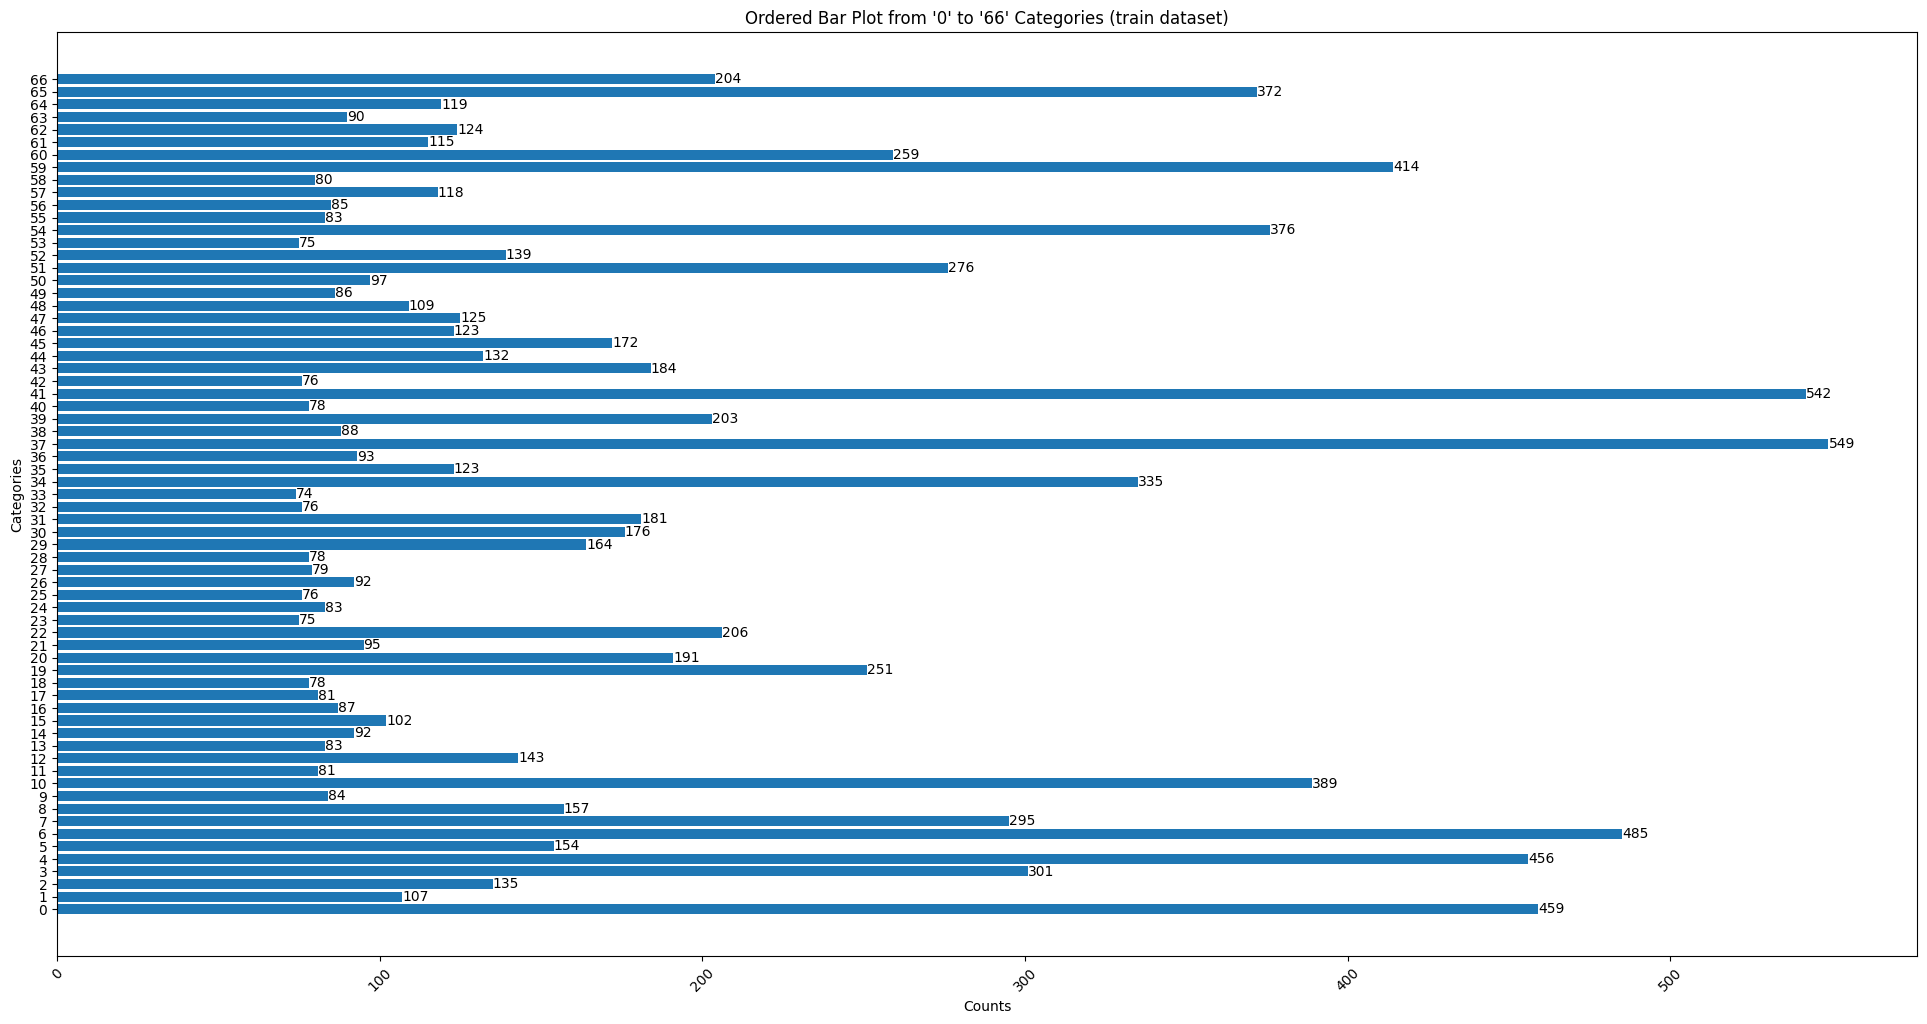

In [65]:
from collections import Counter

# Count the occurrences of each category using Counter
category_counts = Counter(string_array)

# Separate the categories and their counts
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Define the desired order for the categories (ascending order)
desired_order = [str(i) for i in range(67)]

# Create a larger figure (adjust the figure size as needed)
plt.figure(figsize=(24, 12))

# Create a horizontal bar plot with ordered categories
bars = plt.barh(desired_order, [category_counts[category] for category in desired_order])

# Add labels and a title
plt.xlabel("Counts")
plt.ylabel("Categories")
plt.title("Ordered Bar Plot from '0' to '66' Categories (train dataset)")

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add labels on top of each bar
for bar, count in zip(bars, [category_counts[category] for category in desired_order]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center')

# Rotate x-axis labels (adjust the angle as needed)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees

# Show the plot
plt.show()








In [ ]:
counts[11]

In [ ]:
categories

In [ ]:
label_to_count_test=[]

for i in range(0,len(test_dataset)):

  label_to_count_test.append(test_dataset[i][1])
  print(i)


In [68]:
# Your NumPy array of integers
my_array_test = np.array(label_to_count_test)  # Example codes for 'A', 'B', 'C'

# Convert integers to strings using NumPy's vectorized operations
string_array_test = my_array_test.astype(str)

# Now, 'string_array' contains the elements as strings
print(string_array_test)

['41' '0' '34' ... '32' '54' '43']


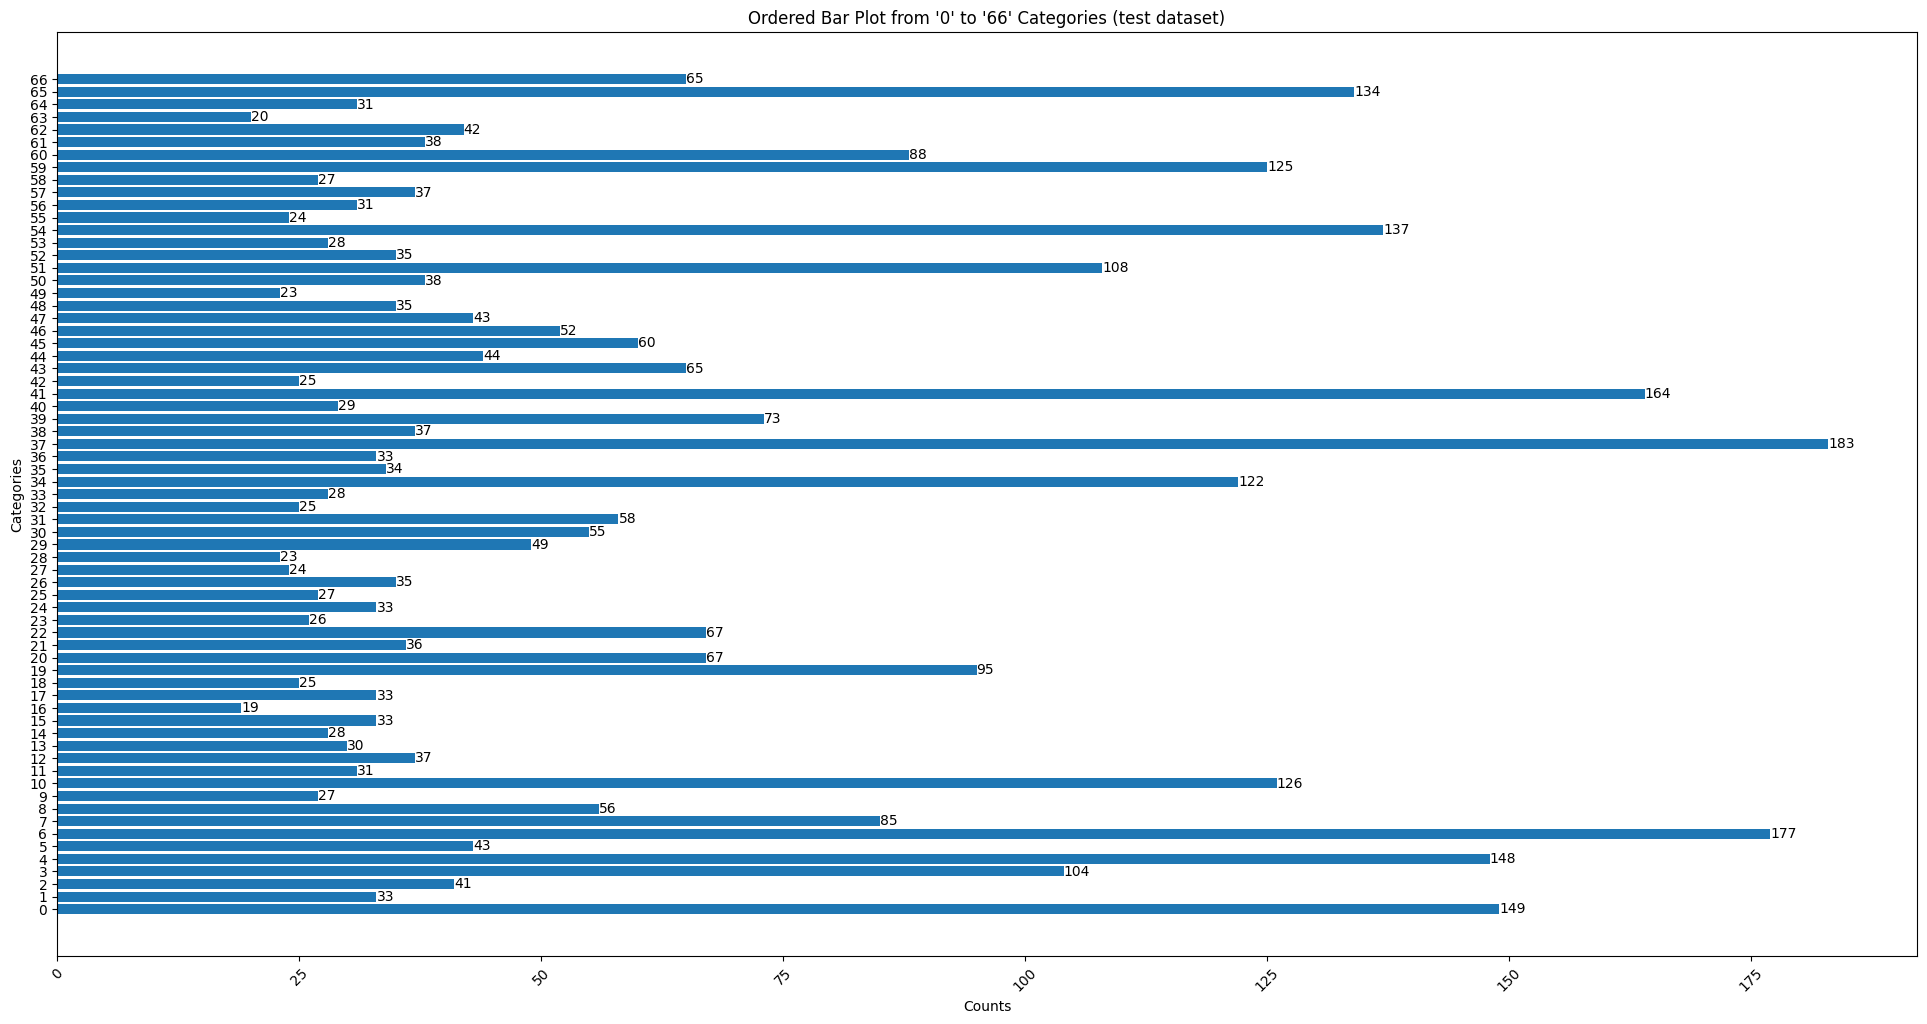

In [70]:
from collections import Counter

# Count the occurrences of each category using Counter
category_counts_test = Counter(string_array_test)

# Separate the categories and their counts
categories = list(category_counts_test.keys())
counts = list(category_counts_test.values())

# Define the desired order for the categories (ascending order)
desired_order = [str(i) for i in range(67)]

# Create a larger figure (adjust the figure size as needed)
plt.figure(figsize=(24, 12))

# Create a horizontal bar plot with ordered categories
bars = plt.barh(desired_order, [category_counts_test[category] for category in desired_order])

# Add labels and a title
plt.xlabel("Counts")
plt.ylabel("Categories")
plt.title("Ordered Bar Plot from '0' to '66' Categories (test dataset)")

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add labels on top of each bar
for bar, count in zip(bars, [category_counts_test[category] for category in desired_order]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center')

# Rotate x-axis labels (adjust the angle as needed)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees

# Show the plot
plt.show()






